<a href="https://colab.research.google.com/github/kKn00077/techit-travel-data-analysis/blob/main/china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 외래관광객조사_2023_중국편

In [1]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gdown

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import gdown

# 스프레드시트 ID
file_id = '1IaknkivoN5gKRPdGysv_fN0zCrEotB3Z'

# CSV 다운로드 링크 생성
download_url = f"https://drive.google.com/uc?id={file_id}"

# 다운로드 파일명 지정
output = '외래관광객조사_2023_데이터.txt'

# 파일 다운로드
gdown.download(download_url, output, quiet=False)

# 데이터 불러오기
df = pd.read_csv(output, delimiter = '\t', encoding='cp949', low_memory=False)
display(df.head(), df.shape)

Downloading...
From: https://drive.google.com/uc?id=1IaknkivoN5gKRPdGysv_fN0zCrEotB3Z
To: /content/외래관광객조사_2023_데이터.txt
100%|██████████| 15.4M/15.4M [00:00<00:00, 83.6MB/s]


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506


(16196, 365)

In [4]:
# 파일 ID 정의
file1_id = '1EuVaZEK82dZKXuiWIa0E984Rl50SzXRd'  # 항목정의서
file2_id = '1zmL3pAUSUs-kBGzt81_wzAn9gYM1djXN'  # 코드정의서

# 다운로드 URL 정의
file1_url = f"https://drive.google.com/uc?id={file1_id}"
file2_url = f"https://drive.google.com/uc?id={file2_id}"

# 출력 파일명
file1_output = '외래관광객조사_2023_항목정의서123.csv'
file2_output = '외래관광객조사_2023_코드정의서123.csv'

# 파일 다운로드
gdown.download(file1_url, file1_output, quiet=False)
gdown.download(file2_url, file2_output, quiet=False)

# 데이터 로드
columns_info_df = pd.read_csv(file1_output)
columns_value_df = pd.read_csv(file2_output)

# display(columns_info_df.head())
# display(columns_value_df.head())

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)

    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

Downloading...
From: https://drive.google.com/uc?id=1EuVaZEK82dZKXuiWIa0E984Rl50SzXRd
To: /content/외래관광객조사_2023_항목정의서123.csv
100%|██████████| 29.5k/29.5k [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zmL3pAUSUs-kBGzt81_wzAn9gYM1djXN
To: /content/외래관광객조사_2023_코드정의서123.csv
100%|██████████| 295k/295k [00:00<00:00, 60.9MB/s]


,항목ID,항목명,변수명,코드값,코드명,비고
0,3.0,한국 방문횟수(카테고리),RVIT,1,1회,NaN
1,3.0,한국 방문횟수(카테고리),RVIT,2,2회,NaN
2,3.0,한국 방문횟수(카테고리),RVIT,3,3회,NaN
3,3.0,한국 방문횟수(카테고리),RVIT,4,4회 이상,NaN
4,3.0,한국 방문횟수(카테고리),RVIT,5,재방문,NaN
...,...,...,...,...,...,...
6384,363.0,방한횟수별,D_NUM,3,3회,NaN
6385,363.0,방한횟수별,D_NUM,4,4회 이상,NaN
6386,364.0,여행형태별,D_GUB,1,개별여행,분석변수
6387,364.0,여행형태별,D_GUB,2,AIR-TEL,NaN


In [5]:
df.fillna(-1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16196 entries, 0 to 16195
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(17), object(1)
memory usage: 45.1+ MB


In [9]:
# 중국 방한 여행객 데이터
chinese_df = df[df['D_NAT'] == 1]
chinese_df.info()
print(chinese_df.shape) # row: 1588, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)

display(chinese_df.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 16195
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(17), object(1)
memory usage: 4.4+ MB
(1588, 365)


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a99,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R1일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,...,MDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외,MDAY전체TOT_RAW61항공제외2,RDAY전체,RDAY전체TOT_RAW2,RDAY전체TOT_RAW61,RDAY전체_개별국제교통비제외,RDAY전체TOT_RAW61항공제외2,MDAY개별대체,MDAY에어대체,MDAY단체대체,MDAY개별61대체,MDAY에어61대체,MDAY단체61대체,MDAY개별61항공제외대체,MDAY에어61항공제외대체,MDAY단체61항공제외대체,RDAY개별대체,RDAY에어대체,RDAY단체대체,RDAY개별61대체,RDAY에어61대체,RDAY단체61대체,RDAY개별61항공제외대체,RDAY에어61항공제외대체,RDAY단체61항공제외대체,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q13,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,3.0,13.0,2.0,3.0,6.0,4.0,3.0,1.0,5.0,-1.0,6.0,4.0,8.0,-1.0,-1.0,-1.0,11.0,1,-1.0,2.0,-1.0,-1.0,5.0,-1.0,-1.0,8.0,-1.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,2.0,3.0,11521.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,6.0,7.0,7.0,2.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,286.76,231.61,231.61,3.0,3.0,3.0,3.0,3.0,286.76,-1.0,-1.0,286.76,-1.0,-1.0,231.61,-1.0,-1.0,3.0,-1.0,-1.0,3.0,-1.0,-1.0,3.0,-1.0,-1.0,0.0,0.0,0.0,772.04,0.0,0.0,386.02,0.0,0.0,0.0,0.0,0.0,0.00,0.0,77.2,0.0,0.0,772.04,0.00,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,8.0,9.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,40.0,10.0,0.0,0.0,0.0,0.0,5.0,7.0,-1.0,5,-1.0,5.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,5,5,5,5,5,5,5,5,5,5,-1.0,5,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,-1.0,-1.0,-1.0,15.0,-1.0,-1.0,-1.0,2.0,1.0,4.0,3.0,6.0,-1.0,4.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,1,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,4.0,1.0,11012.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,70.0

In [10]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}

# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in chinese_df.columns:
        chinese_df.loc[:, col] = chinese_df[col].map(mapping).fillna(chinese_df[col])

# 데이터 분석 및 시각화

In [11]:
# 방한하는 나이, 성별, 연령대 분석

# 성별, 연령, 목적, 방한 횟수, 그외 ...
info_df = chinese_df[['D_SEX',  # 성별
                      'D_AGE',  # 나이
                      'D_MOK',  # 방한목적별
                      'D_NUM',  # 방한횟수별
                      'Q1_1a1', # 한국여행 관심 계기 1순위
                      'Q2a1',   # 방문을 고려한 아시아 국가 1순위
                      'Q2_1a1', # 해당국가 관심 계기 1순위
                      'Q3_1a1', # 고려한 관광활동 1순위
                      'Q3_2a1', # 고려한 관광인프라 1순위
                      'Q4a1',   # 여행전 한국관련 정보 수집 경로 1순위
                      'Q4_1a1', # 주로 이용한 사이트 1순위
                      'Q4_2a1', # 부족했던 정보 1순위
                      'Q5',     # 왕복 항공권 및 여행상품 예약시기
                      'Q7A',    # 동반자 유무
                      'Q8a01',  # 참여한 활동 1순위
                      'Q8a02',  # 참여한 활동 2순위
                      'Q8a03',  # 참여한 활동 3순위
                      'Q8_1a1', # 만족한 활동 1순위
                      'Q8_1a2', # 만족한 활동 2순위
                      'Q8_1a3', # 만족한 활동 3순위
                      'Q9_1_1', # 가장 좋았던 곳 1순위
                      'Q9_1_2', # 가장 좋았던 곳 2순위
                      'Q9_1_3', # 가장 좋았던 곳 3순위
                      'KWON1',  # 방문권역1
                      'KWON2',  # 방문권역2
                      'KWON3',  # 방문권역3
                      'KWONA1', # 수도권 및 지방 방문율(수도권 한정)
                      'KWONB1', # 수도권 및 지방 방문율(수도권 방문)
                      'M박HAP', # 총 숙박기간
                      'M일HAP', # 총 체재기간
                      'Q9_5A1', # 주요 이용 숙박시설 1순위
                      'Q9_5A2', # 주요 이용 숙박시설 1순위
                      'Q9_5A3', # 주요 이용 숙박시설 1순위
                      'Q10_2a01',    # 쇼핑 항목 1순위
                      'Q10_2a02',    # 쇼핑 항목 2순위
                      'Q10_2a03',    # 쇼핑 항목 3순위
                      'Q10_3a1',     # 쇼핑 장소 1순위
                      'Q10_3a2',     # 쇼핑 장소 2순위
                      'Q10_3a3',     # 쇼핑 장소 3순위
                      'Q11',         # 전반적 만족도
                      'Q12a01',      # 항목별 만족도 (식도락(음식))
                      'Q12a02',      # 항목별 만족도 (쇼핑)
                      'Q12a03',      # 항목별 만족도 (자연경관 감상)
                      'Q12a04',      # 항목별 만족도 (고궁/역사 유적지 방문)
                      'Q12a05',      # 항목별 만족도 (전통문화체험)
                      'Q12a06',      # 항목별 만족도 (박물관, 전시관 관람)
                      'Q12a07',      # 항목별 만족도 (K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문)
                      'Q12a08',      # 항목별 만족도 (연극, 뮤지컬, 발레 등 공연 관람)
                      'Q12a09',      # 항목별 만족도 (지역 축제 참여)
                      'Q12a10',      # 항목별 만족도 (유흥(나이트라이프 활동 및 카지노등))
                      'Q12a11',      # 항목별 만족도 (오락(놀이공원 및 테마파크 방문 등))
                      'Q12a12',      # 항목별 만족도 (뷰티/미용 관광(마사지샵, 헤어샵, 네일케어등 방문))
                      'Q12a13',      # 항목별 만족도 (치료/건강검진 (피부과, 성형외과, 내/외과 입원, 수술 등))
                      'Q12a14',      # 항목별 만족도 (스포츠/레포츠 관람 (야구, 축구, 농구 등))
                      'Q12a15',      # 항목별 만족도 (스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등))
                      'Q13',         # 재방문 의사
                      'Q14'          # 타인 추천 의향
]]

display(info_df[info_df['D_MOK'] == -1])

,D_SEX,D_AGE,D_MOK,D_NUM,Q1_1a1,Q2a1,Q2_1a1,Q3_1a1,Q3_2a1,Q4a1,Q4_1a1,Q4_2a1,Q5,Q7A,Q8a01,Q8a02,Q8a03,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,KWON1,KWON2,KWON3,KWONA1,KWONB1,M박HAP,M일HAP,Q9_5A1,Q9_5A2,Q9_5A3,Q10_2a01,Q10_2a02,Q10_2a03,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q13,Q14


In [12]:
# 한글 폰트 세팅

# 구글 코렙에서 한글 폰트 설치
!sudo apt-get install -y fonts-noto-cjk

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # 일반 글씨
font_path_bold = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'  # 굵은 글씨

# 폰트 등록
font_manager.fontManager.addfont(font_path)

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 6s (9,454 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package f

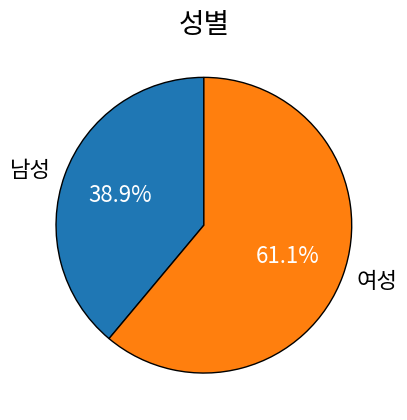

In [43]:
import matplotlib.pyplot as plt

# 성별
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_SEX'] != -1, 'D_SEX'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_SEX'] != -1, 'D_SEX'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values[0]

# 순서를 조정 (여성이 먼저 오도록)
value_counts = value_counts.sort_index(ascending=True)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts,
                                  labels=value_counts.index,
                                  autopct=make_autopct(value_counts),
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

# 그래프 보여주기
plt.show()


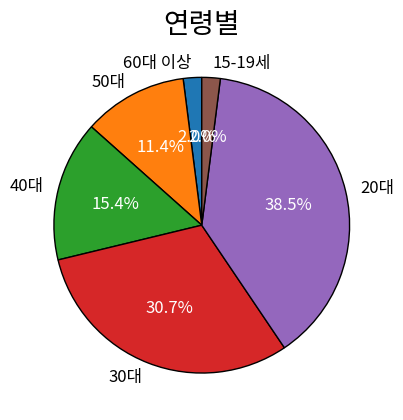

In [47]:
import matplotlib.pyplot as plt

# 연령별
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_AGE'] != -1, 'D_AGE'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_AGE'] != -1, 'D_AGE'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'D_AGE', '항목명'].head(1).values[0]

# 순서를 조정 (20대가 먼저 오도록)
value_counts = value_counts.sort_index(ascending=False)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts,
                                  labels=value_counts.index,
                                  autopct=make_autopct(value_counts),
                                  startangle=90,
                                  textprops={'fontsize': 12},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

# 그래프 보여주기
plt.show()


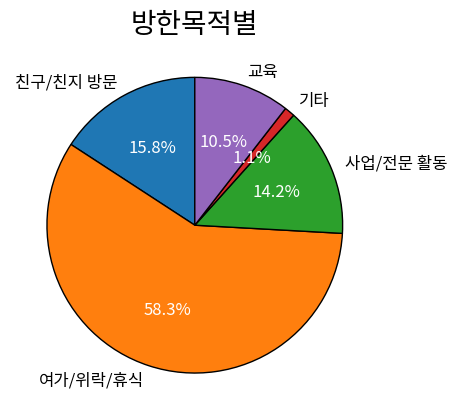

In [48]:
import matplotlib.pyplot as plt

# 방한목적별
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['D_MOK'] != -1, 'D_MOK'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['D_MOK'] != -1, 'D_MOK'].value_counts()  # 절대값 카운트

# 항목명 추출
xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'D_MOK', '항목명'].head(1).values[0]

# 순서를 조정 (20대가 먼저 오도록)
value_counts = value_counts.sort_index(ascending=False)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts,
                                  labels=value_counts.index,
                                  autopct=make_autopct(value_counts),
                                  startangle=90,
                                  textprops={'fontsize': 12},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

# 그래프 보여주기
plt.show()


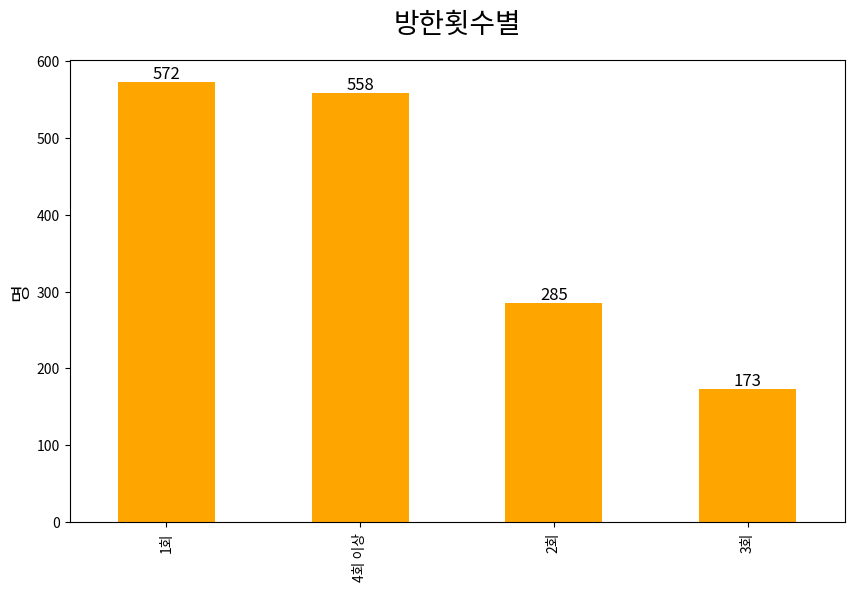

In [58]:
import matplotlib.pyplot as plt

# 방한횟수별
value_counts = info_df.loc[info_df['D_NUM'] != -1, 'D_NUM'].value_counts()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax = value_counts.plot.bar(
    ylabel='명',
    xlabel='',
    color='orange'
)

# 막대 상단에 개수 표시
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12)

# x축 텍스트 제거하고 y축 텍스트 크기 설정
ax.set_xlabel('')
ax.set_ylabel('명', fontsize=14)

# 제목 추가
ax.set_title('방한횟수별', fontsize=20, pad=20)  # 제목을 상단으로 이동

# 그래프 보여주기
plt.show()

In [60]:
# 재방문율 계산

# 'D_NUM' 값을 기준으로 재분류
info_df['D_NUM_reclassified'] = info_df['D_NUM'].apply(
    lambda x: '재방문' if x in ['2회', '3회', '4회 이상'] else '1회'
)

# 재분류된 값 확인
visit_counts = info_df['D_NUM_reclassified'].value_counts()
display(visit_counts)

# 재방문율 계산
revisit_rate = (visit_counts['재방문'] / (visit_counts['재방문'] + visit_counts['1회'])) * 100
print(f'재방문율 : {revisit_rate:.2f}%')

,count
D_NUM_reclassified,
재방문,1016
1회,572


재방문율 : 63.98%


* 재방문율은 63.98% 로 높은 편이 아닌가요?

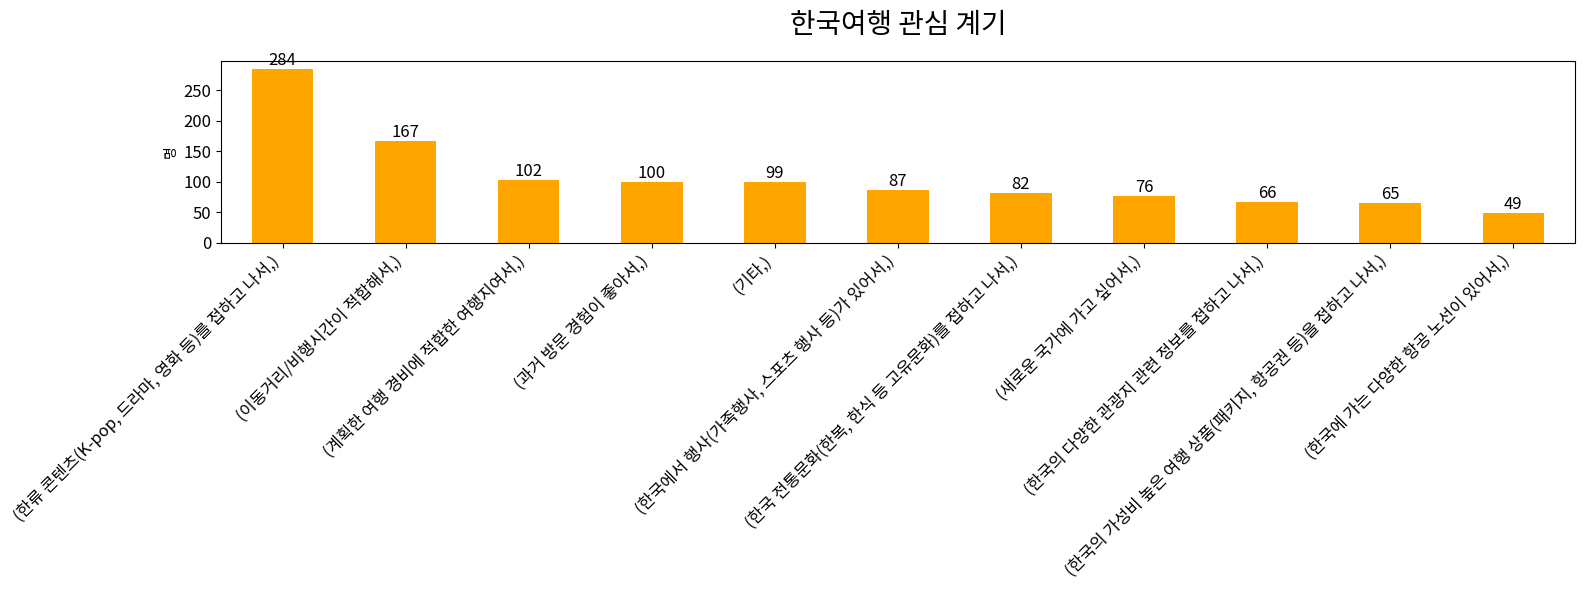

In [74]:
import matplotlib.pyplot as plt

# 한국여행 관심 계기 1순위
fig, ax = plt.subplots(figsize=(16, 6))  # 그래프와 축 생성
info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ax=ax,  # 축 객체를 전달
    ylabel='명',
    xlabel='',
    color='orange'
)

# 막대 상단에 개수 표시
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12)

# 제목 추가
ax.set_title('한국여행 관심 계기', fontsize=20, pad=20)  # 제목을 상단으로 이동


# 축, 제목 및 기타 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

관심 계기를 시각화 해서 봤을 경우 (무응답 제외) <BR>
1순위 : (한류 콘텐츠를 접하고 나서) <BR>
2순위 : (계획한 여행 경비에 적합한 여행지여서) <BR>
3순위 : (이동거리/비행시간이 적합해서) <BR><BR>

일본의 1위인 (새로운 국가에 가고 싶어서)는 7,8위를 차지하고 있어 중국과는 상이한 결과를 보여줌

In [108]:
# # 방문을 고려한 아시아 국가 1순위
# info_df.loc[info_df['Q2a1'] != -1, ['Q2a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q2a1', '항목명'].head(1).values
# )

In [109]:
# # 해당국가 관심 계기 1순위
# info_df.loc[info_df['Q2_1a1'] != -1, ['Q2_1a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q2_1a1', '항목명'].head(1).values
# )

* 한국을 제외한 방문 고려 국가 1위는 일본이다. <br>
* 일본 방문에 관심을 가진 계기는 (국가의 다양한 관광지 관련 정보를 접하고 나서)이다.

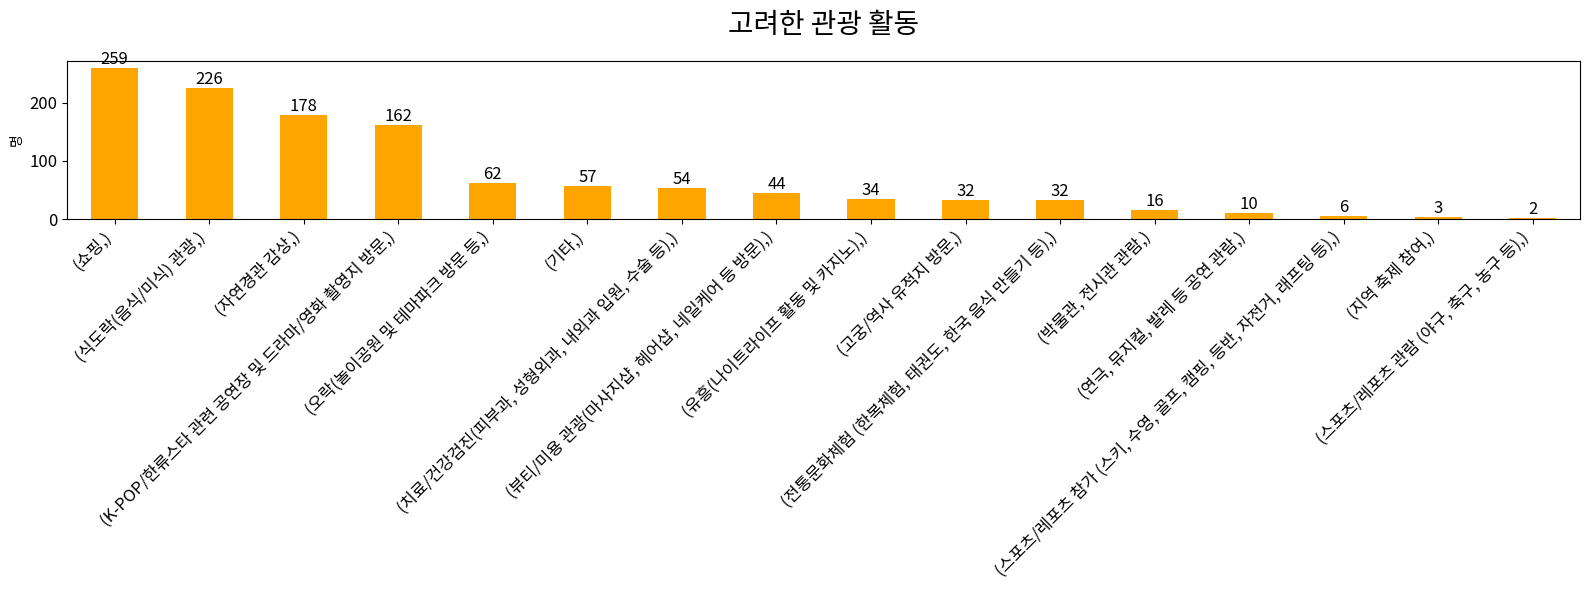

In [81]:
import matplotlib.pyplot as plt

# 고려한 관광활동 1순위
fig, ax = plt.subplots(figsize=(16, 6))  # 그래프와 축 생성
info_df.loc[info_df['Q3_1a1'] != -1, ['Q3_1a1']].value_counts().plot.bar(
    ax=ax,  # 축 객체를 전달
    ylabel='명',
    xlabel='',
    color='orange'
)

# 막대 상단에 개수 표시
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12)

# 제목 추가
ax.set_title('고려한 관광 활동', fontsize=20, pad=20)  # 제목을 상단으로 이동


# 축, 제목 및 기타 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

* (쇼핑), (식도락), (자연경관 감상)이 1, 2, 3위이다. <br>
* 한국여행 관심 계기가 [한류콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서]이지만 정작 해당 촬영지 방문은 4위이다. <br>
* 직접적인 촬영지 방문이 아니라, 한류콘텐츠를 보았을 때의 전반적인 문화에 흥미가 생겨서 방문을 결심한 것이 아닐까 추측할 수 있다.

In [110]:
# # 고려한 관광인프라 1순위
# info_df.loc[info_df['Q3_2a1'] != -1, ['Q3_2a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q3_2a1', '항목명'].head(1).values
# )

In [111]:
# # 여행전 한국관련 정보 수집 경로 1순위
# info_df.loc[info_df['Q4a1'] != -1, ['Q4a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4a1', '항목명'].head(1).values
# )

In [112]:
# # 주로 이용한 사이트 1순위
# info_df.loc[info_df['Q4_1a1'] != -1, ['Q4_1a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_1a1', '항목명'].head(1).values
# )

* 주로 이용한 사이트 1순위가 소셜미디어다. [더우인]을 한 번 크롤링해보자!

In [113]:
# # 부족했던 정보 1순위
# info_df.loc[info_df['Q4_2a1'] != -1, ['Q4_2a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_2a1', '항목명'].head(1).values
# )

* 교통정보가 부족하다고 느낀다. 중국인들은 네이버지도나 구글지도를 못쓰나? 중국인들이 한국에서 길찾기할 때 어떤 앱을 쓰는 걸까?

In [114]:
# # 왕복 항공권 및 여행상품 예약시기
# info_df.loc[info_df['Q5'] != -1, ['Q5']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q5', '항목명'].head(1).values
# )

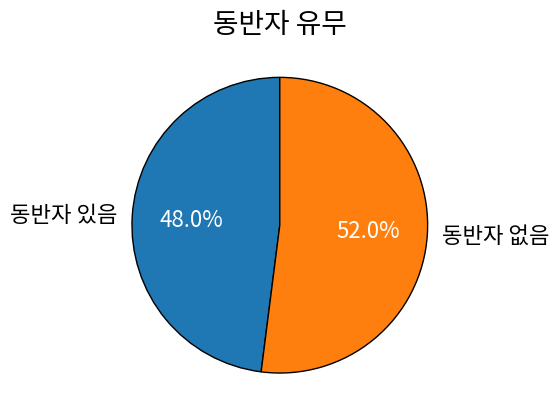

In [78]:
import matplotlib.pyplot as plt

# 동반자 유무
# 값 필터링 및 카운트
value_counts = info_df.loc[info_df['Q7A'] != -1, 'Q7A'].value_counts(normalize=True) * 100  # 퍼센트 계산
counts = info_df.loc[info_df['Q7A'] != -1, 'Q7A'].value_counts()  # 절대값 카운트

# 항목명 추출
# xlabel_name = columns_value_df.loc[columns_value_df['변수명'] == 'Q7A', '항목명'].head(1).values[0]
xlabel_name = '동반자 유무'

# 순서를 조정
value_counts = value_counts.sort_index(ascending=False)

# 커스텀 함수로 % 표시 텍스트의 색상 설정
def make_autopct(values):
    def custom_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%'  # 비율만 표시
    return custom_autopct

# 파이 그래프 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts,
                                  labels=value_counts.index,
                                  autopct=make_autopct(value_counts),
                                  startangle=90,  # 12시 방향 기준
                                  textprops={'fontsize': 16},
                                  wedgeprops={'edgecolor': 'k'})  # 경계선 추가(optional)

# % 텍스트 색상 화이트로 설정
for autotext in autotexts:
    autotext.set_color('white')

# 그래프 제목 추가
ax.set_title(xlabel_name, fontsize=20)

# 그래프 보여주기
plt.show()


* 혼자서 오는 여행객이 절반 이상이다. 대부분은 20~30대겠지?

In [115]:
# # 참여한 활동 1순위
# info_df.loc[info_df['Q8a01'] != -1, ['Q8a01']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8a01', '항목명'].head(1).values
# )

In [116]:
# # 참여한 활동 2순위
# info_df.loc[info_df['Q8a02'] != -1, ['Q8a02']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8a02', '항목명'].head(1).values
# )

In [117]:
# # 참여한 활동 3순위
# info_df.loc[info_df['Q8a03'] != -1, ['Q8a03']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8a03', '항목명'].head(1).values
# )

* 참여한 활동 순위는 : <br>
  * 1위 : 식도락(음식/미식) 관광 <br>
  * 2위 : 쇼핑 <br>
  * 3위 : 자연경관 감상 <br>

<Axes: xlabel='[참여한 활동]', ylabel='[명]'>

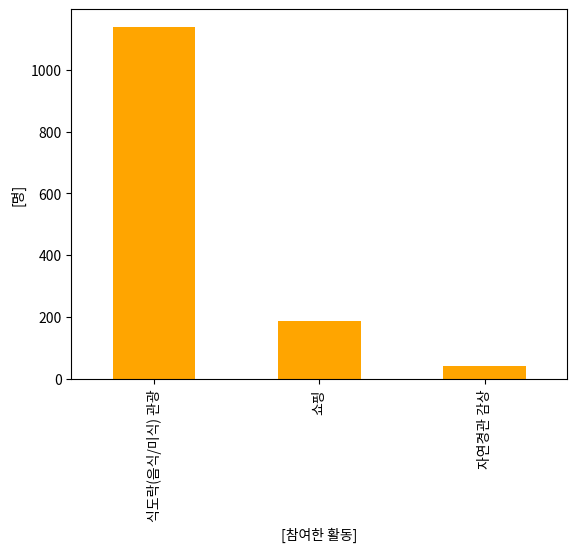

In [ ]:
# 참여한 활동 1-2-3순위 합치기

# "Q8a01", "Q8a02", "Q8a03" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q8a00'] = info_df[["Q8a01", "Q8a02", "Q8a03"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['Q8a00'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['참여한 활동']
)

In [118]:
# # 만족한 활동 1순위
# info_df.loc[info_df['Q8_1a1'] != -1, ['Q8_1a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8_1a1', '항목명'].head(1).values
# )

In [119]:
# # 만족한 활동 2순위
# info_df.loc[info_df['Q8_1a2'] != -1, ['Q8_1a2']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8_1a2', '항목명'].head(1).values
# )

In [120]:
# # 만족한 활동 3순위
# info_df.loc[info_df['Q8_1a3'] != -1, ['Q8_1a3']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8_1a3', '항목명'].head(1).values
# )

* 만족한 활동 순위는 참여한 활동 순위와 1위, 2위가 바뀐다. <br>
  * 1위 : 쇼핑 -- 참여한 활동 순위 2위 <br>
  * 2위 : 식도락(음식/미식) 관광 -- 참여한 활동 순위 1위 <br>
  * 3위 : 자연경관 감상 <br>

<Axes: xlabel='[만족한 활동]', ylabel='[명]'>

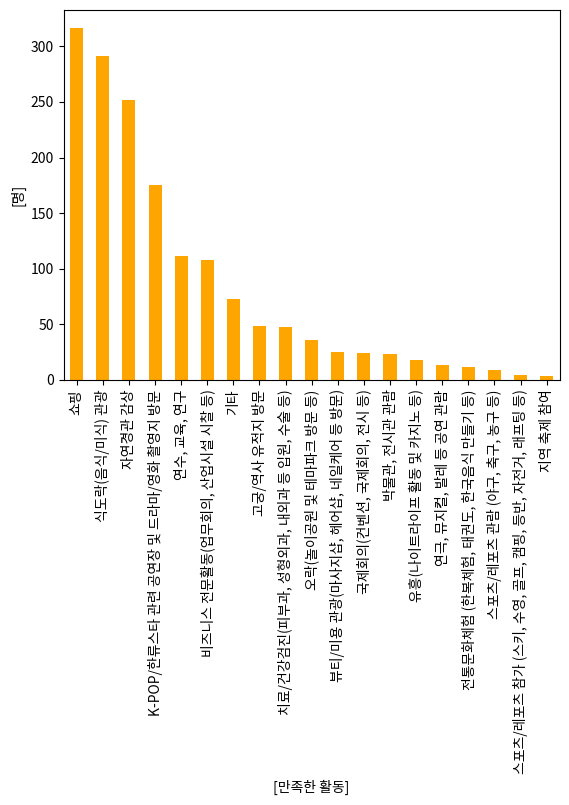

In [ ]:
# 만족한 활동 1-2-3순위 합치기

# "Q8_1a1", "Q8_1a2", "Q8_1a3" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q8_1a0'] = info_df[["Q8_1a1", "Q8_1a2", "Q8_1a3"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['Q8_1a0'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['만족한 활동']
)

In [121]:
# # 가장 좋았던 곳 1순위 TOP 10

# # 분석 제외 대상 (없음/모름/무응답이 1위로 나오므로 제외함)
# exclude_values = [-1, '없음/모름/무응답']

# # 'Q9_1_1' 에서 상위 10개 장소만 추출
# top_10_places_1 = info_df.loc[~info_df['Q9_1_1'].isin(exclude_values), ['Q9_1_1']].value_counts().head(10)

# # 상위 10개 장소 시각화
# top_10_places_1.plot.bar(
#     ylabel='명',
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_1_1', '항목명'].head(1).values,
#     title="가장 좋았던 곳 TOP 10 (1순위)"
# )


In [122]:
# # 가장 좋았던 곳 2순위 TOP 10

# # 'Q9_1_2' 에서 상위 10개 장소만 추출
# top_10_places_2 = info_df.loc[info_df['Q9_1_2'] != -1, ['Q9_1_2']].value_counts().head(10)

# # 상위 10개 장소 시각화
# top_10_places_2.plot.bar(
#     ylabel='명',
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_1_2', '항목명'].head(1).values,
#     title="가장 좋았던 곳 TOP 10 (2순위)"
# )

In [123]:
# # 가장 좋았던 곳 3순위 TOP 10

# # 'Q9_1_3' 에서 상위 10개 장소만 추출
# top_10_places_3 = info_df.loc[info_df['Q9_1_3'] != -1, ['Q9_1_3']].value_counts().head(10)

# # 상위 10개 장소 시각화
# top_10_places_3.plot.bar(
#     ylabel='명',
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_1_3', '항목명'].head(1).values,
#     title="가장 좋았던 곳 TOP 10 (3순위)"
# )

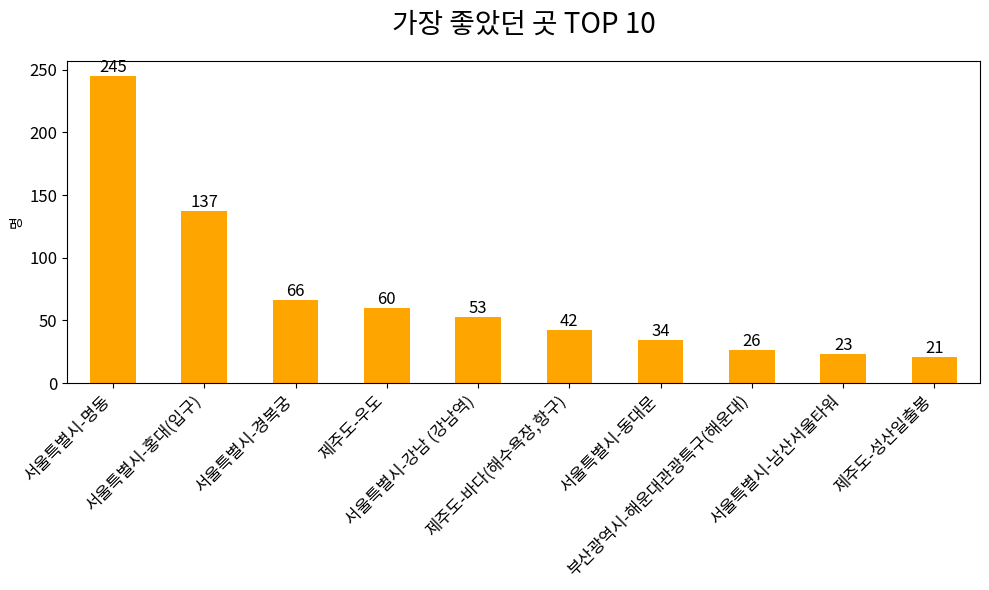

In [94]:
# 가장 좋았던 곳 1-2-3순위 합치기

import matplotlib.pyplot as plt

# 분석 제외 대상 (없음/모름/무응답이 1위로 나오므로 제외함)
exclude_values = [-1, '없음/모름/무응답']

# "Q9_1_1", "Q9_1_2", "Q9_1_3" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q9_1_0'] = info_df[["Q9_1_1", "Q9_1_2", "Q9_1_3"]].replace(exclude_values, None).bfill(axis=1).iloc[:, 0]

# 상위 10개만 가져오기
top_10_places = info_df['Q9_1_0'].value_counts().head(10)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
top_10_places.plot.bar(
    ax=ax,
    color='orange',
    ylabel='명',
    xlabel=''
)

# 막대 상단에 개수 표시
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12)

# 제목 추가
ax.set_title('가장 좋았던 곳 TOP 10', fontsize=20, pad=20) # 제목을 상단으로 이동

# 축, 제목 및 기타 설정
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

* 가장 좋았던 곳 TOP 10에서 서울이 6곳, 제주도가 3곳, 부산이 1곳이다.

In [124]:
# # 방문권역1
# info_df.loc[info_df['KWON1'] != -1, ['KWON1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'KWON1', '항목명'].head(1).values
# )

In [125]:
# # 방문권역2
# info_df.loc[info_df['KWON2'] != -1, ['KWON2']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'KWON2', '항목명'].head(1).values
# )

In [126]:
# # 방문권역3
# info_df.loc[info_df['KWON3'] != -1, ['KWON3']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'KWON3', '항목명'].head(1).values
# )

<Axes: xlabel='[주요 방문권역]', ylabel='[명]'>

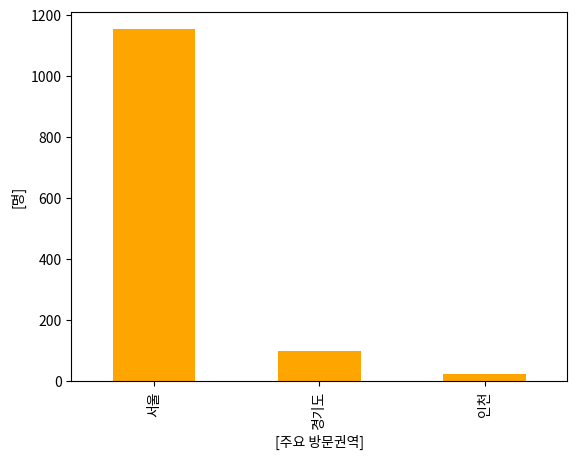

In [ ]:
# 주요 방문권역 1-2-3순위 합치기

# "KWON1", "KWON2", "KWON3" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['KWON'] = info_df[["KWON1", "KWON2", "KWON3"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['KWON'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['주요 방문권역']
)

* 방문권역은 서울 > 경기도 > 인천 순이다. 수도권에 집중되어 있다.

<Axes: title={'center': '숙박기간 TOP 10'}, xlabel='[]', ylabel='명'>

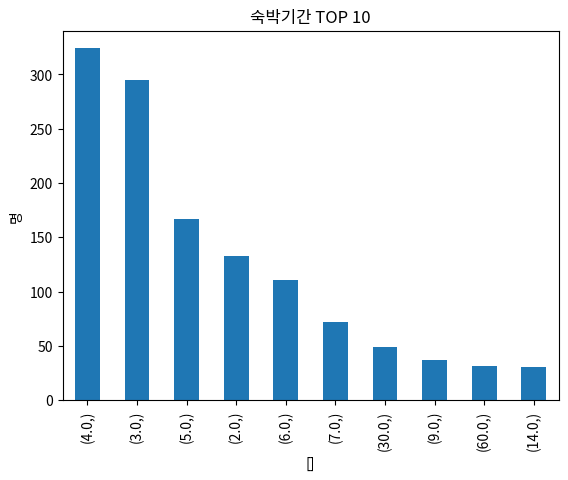

In [ ]:
# 총 숙박기간 TOP 10

# 'M박HAP' 에서 상위 10개만 추출
top_10_sleeps = info_df.loc[info_df['M박HAP'] != -1, ['M박HAP']].value_counts().head(10)

# 상위 10개 시각화
top_10_sleeps.plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'M박HAP', '항목명'].head(1).values,
    title="숙박기간 TOP 10"
)

<Axes: title={'center': '체제기간 TOP 10'}, xlabel='[]', ylabel='명'>

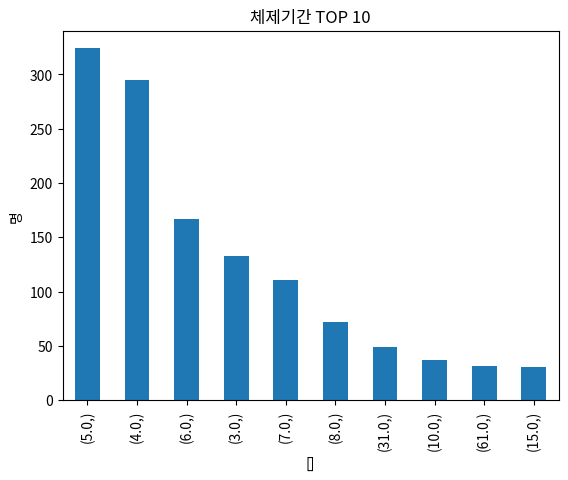

In [ ]:
# 총 체제기간 TOP 10

# 'M일HAP' 에서 상위 10개만 추출
top_10_stays = info_df.loc[info_df['M일HAP'] != -1, ['M일HAP']].value_counts().head(10)

# 상위 10개 시각화
top_10_stays.plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'M일HAP', '항목명'].head(1).values,
    title="체제기간 TOP 10"
)

* 4박5일 > 3박4일 > 5박6일 순서이고, 4박5일이 가장 많다.

In [127]:
# # 주요 이용 숙박시설 1순위
# info_df.loc[info_df['Q9_5A1'] != -1, ['Q9_5A1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_5A1', '항목명'].head(1).values
# )

In [128]:
# # 주요 이용 숙박시설 2순위
# info_df.loc[info_df['Q9_5A2'] != -1, ['Q9_5A2']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_5A2', '항목명'].head(1).values
# )

In [129]:
# # 주요 이용 숙박시설 3순위
# info_df.loc[info_df['Q9_5A3'] != -1, ['Q9_5A3']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_5A3', '항목명'].head(1).values
# )

<Axes: xlabel='[주요 이용 숙박시설]', ylabel='[명]'>

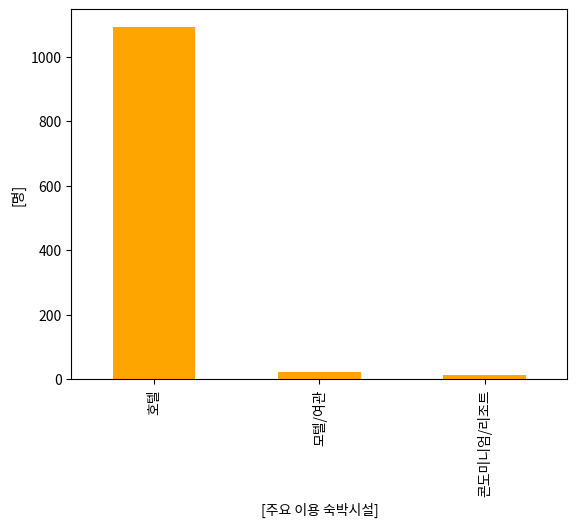

In [ ]:
# 주요 이용 숙박시설 1-2-3순위 합치기

# "Q9_5A1", "Q9_5A2", "Q9_5A3" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q9_5A'] = info_df[["Q9_5A1", "Q9_5A2", "Q9_5A3"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['Q9_5A'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['주요 이용 숙박시설']
)

* 주요 이용 숙박시설 순위는 : <br>
 * 1위 : 호텔 <br>
 * 2위 : 모텔/여관 <br>
 * 3위 : 콘도미니엄/리조트

In [130]:
# # 쇼핑 항목 1순위
# info_df.loc[info_df['Q10_2a01'] != -1, ['Q10_2a01']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_2a01', '항목명'].head(1).values
# )

In [131]:
# # 쇼핑 항목 2순위
# info_df.loc[info_df['Q10_2a02'] != -1, ['Q10_2a02']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_2a02', '항목명'].head(1).values
# )

In [132]:
# # 쇼핑 항목 3순위
# info_df.loc[info_df['Q10_2a03'] != -1, ['Q10_2a03']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_2a03', '항목명'].head(1).values
# )

<Axes: xlabel='[주요 쇼핑 항목]', ylabel='[명]'>

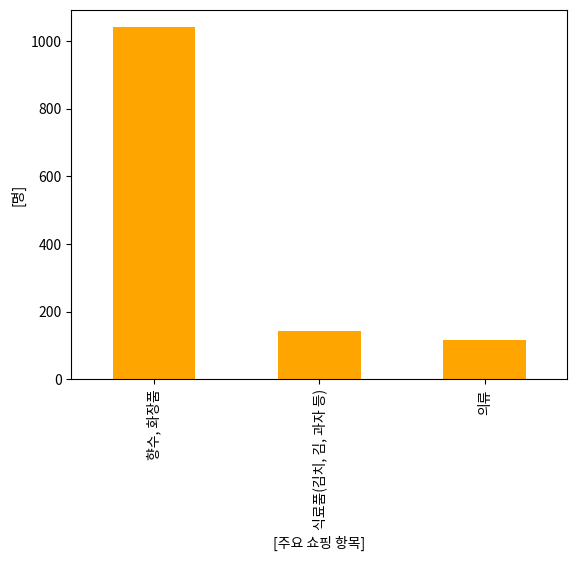

In [ ]:
# 쇼핑 항목 1-2-3순위 합치기

# "Q10_2a01", "Q10_2a02", "Q10_2a03" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q10_2a'] = info_df[["Q10_2a01", "Q10_2a02", "Q10_2a03"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['Q10_2a'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['주요 쇼핑 항목']
)

* 쇼핑항목은 순위는 : <br>
 * 1위 : 향수/화장품 <br>
 * 2위 : 식료품(김치, 김, 과자등) <br>
 * 3위 : 의류 <br>

In [144]:
# # 쇼핑 장소 1순위
# info_df.loc[info_df['Q10_3a1'] != -1, ['Q10_3a1']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_3a1', '항목명'].head(1).values
# )

In [143]:
# # 쇼핑 장소 2순위
# info_df.loc[info_df['Q10_3a2'] != -1, ['Q10_3a2']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_3a2', '항목명'].head(1).values
# )

In [142]:
# # 쇼핑 장소 3순위
# info_df.loc[info_df['Q10_3a3'] != -1, ['Q10_3a3']].value_counts().plot.bar(
#     ylabel=['명'],
#     xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_3a3', '항목명'].head(1).values
# )

<Axes: xlabel='[주요 쇼핑 장소]', ylabel='[명]'>

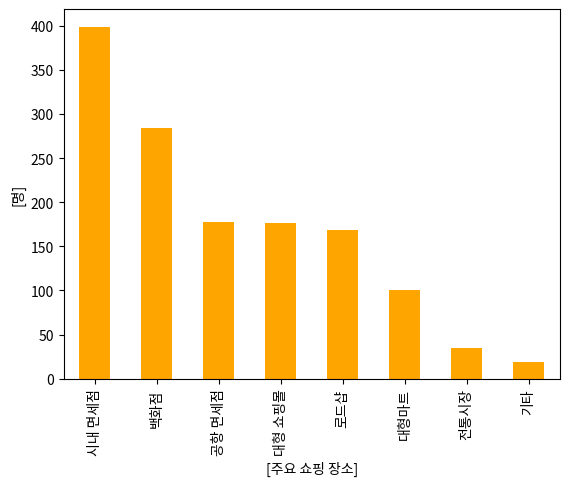

In [145]:
# 쇼핑 장소 1-2-3순위 합치기

# "Q10_3a1", "Q10_3a2", "Q10_3a3" 에서 -1을 제외한 첫번째 값을 가져오기
info_df['Q10_3a'] = info_df[["Q10_3a1", "Q10_3a2", "Q10_3a3"]].replace(-1.0, None).bfill(axis=1).iloc[:, 0]

info_df['Q10_3a'].value_counts().plot.bar(
    color='orange',
    ylabel=['명'],
    xlabel=['주요 쇼핑 장소']
)

* 쇼핑장소는 시내/공항 면세점 > 백화점 > 대형 쇼핑몰 순서이다. <br>
* 전통시장은 1순위~3순위까지 모두 꼴찌다. =>> 광장시장, 통인시장 많이 가지 않나?

Q11 평균 점수: 4.50
Q12a01 평균 점수: 4.53
Q12a02 평균 점수: 4.56
Q12a03 평균 점수: 4.72
Q12a04 평균 점수: 4.64
Q12a05 평균 점수: 4.70
Q12a06 평균 점수: 4.62
Q12a07 평균 점수: 4.81
Q12a08 평균 점수: 4.64
Q12a09 평균 점수: 4.28
Q12a10 평균 점수: 4.54
Q12a11 평균 점수: 4.63
Q12a12 평균 점수: 4.56
Q12a13 평균 점수: 4.61
Q12a14 평균 점수: 4.62
Q12a15 평균 점수: 4.69


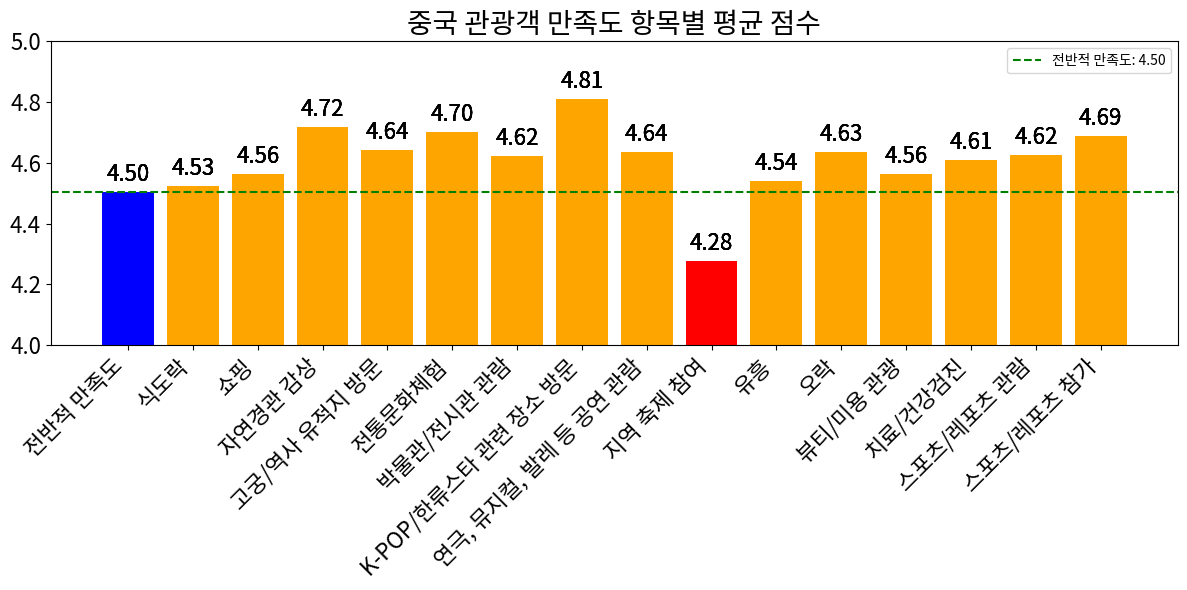

In [146]:
# 만족도 항목 점수

info_satisfied_df = info_df[[
                      'Q11',         # 전반적 만족도
                      'Q12a01',      # 항목별 만족도 (식도락(음식))
                      'Q12a02',      # 항목별 만족도 (쇼핑)
                      'Q12a03',      # 항목별 만족도 (자연경관 감상)
                      'Q12a04',      # 항목별 만족도 (고궁/역사 유적지 방문)
                      'Q12a05',      # 항목별 만족도 (전통문화체험)
                      'Q12a06',      # 항목별 만족도 (박물관, 전시관 관람)
                      'Q12a07',      # 항목별 만족도 (K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문)
                      'Q12a08',      # 항목별 만족도 (연극, 뮤지컬, 발레 등 공연 관람)
                      'Q12a09',      # 항목별 만족도 (지역 축제 참여)
                      'Q12a10',      # 항목별 만족도 (유흥(나이트라이프 활동 및 카지노등))
                      'Q12a11',      # 항목별 만족도 (오락(놀이공원 및 테마파크 방문 등))
                      'Q12a12',      # 항목별 만족도 (뷰티/미용 관광(마사지샵, 헤어샵, 네일케어등 방문))
                      'Q12a13',      # 항목별 만족도 (치료/건강검진 (피부과, 성형외과, 내/외과 입원, 수술 등))
                      'Q12a14',      # 항목별 만족도 (스포츠/레포츠 관람 (야구, 축구, 농구 등))
                      'Q12a15',      # 항목별 만족도 (스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등))
]]

# 점수 매핑
score_mapping = {
    "매우 만족": 5,
    "만족": 4,
    "보통": 3,
    "불만족": 2,
    "매우 불만족": 1
}

# 평균 점수 저장 딕셔너리
averages = {}

# Q11부터 Q12a15까지 각 항목의 평균 점수 계산
for column in info_satisfied_df.columns:
    # 점수 매핑 적용
    info_satisfied_df[f'{column}_score'] = info_satisfied_df[column].map(score_mapping)

    # 평균 점수 계산
    averages[column] = info_satisfied_df[f'{column}_score'].dropna().mean()

# 평균 점수 출력
for col, avg in averages.items():
    print(f'{col} 평균 점수: {avg:.2f}')


# 만족도 통합 그래프

# 변수명에 매핑된 항목명 추출 및 정렬
filtered_df = columns_value_df[columns_value_df['변수명'].isin(averages.keys())]
filtered_df = filtered_df.sort_values(by='변수명')  # 변수명을 기준으로 정렬


# X축과 Y축 데이터 생성
x_labels = filtered_df['항목명'].tolist()  # 항목 변수명 (Q11, Q12a01 등)
y_values = [averages[key] for key in filtered_df['변수명']]

# 색상 설정: 특정 항목 강조
colors = [
    'blue' if col == '전반적 만족도' else 'red' if col == '지역 축제 참여' else 'orange'
    for col in x_labels
]

# 그래프 생성
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, y_values, color=colors)

# 막대 위에 점수 표시
for bar, score in zip(bars, y_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{score:.2f}', ha='center', va='bottom', fontsize=16)

# 그래프 제목 및 축 설정
plt.title('중국 관광객 만족도 항목별 평균 점수', fontsize=20, fontweight='bold')
# plt.xlabel('항목명', fontsize=12)
# plt.ylabel('평균 점수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(4, 5)  # Y축 범위 설정

# 기준선 추가 (Q11의 평균 점수 기준)
plt.axhline(y=averages['Q11'], color='green', linestyle='--', linewidth=1.5, label=f"전반적 만족도: {averages['Q11']:.2f}")

# 범례 추가
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='[문13. 재방문 의사]', ylabel='[명]'>

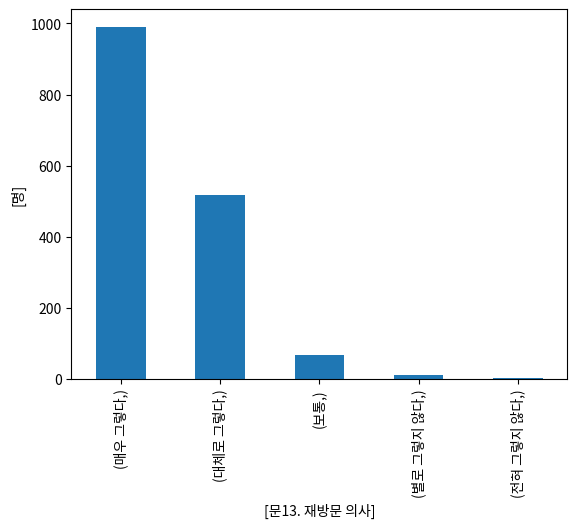

In [ ]:
# 재방문 의사
info_df.loc[info_df['Q13'] != -1, ['Q13']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q13', '항목명'].head(1).values
)

In [ ]:
# 재방문의사 점수화
info_df['Q13'].value_counts()

# 점수 매핑
score_mapping = {
    "매우 그렇다": 5,
    "대체로 그렇다": 4,
    "보통": 3,
    "별로 그렇지 않다": 2,
    "전혀 그렇지 않다": 1
}

# 컬럼 값을 점수로 매핑
info_df['Q13_score'] = info_df['Q13'].map(score_mapping)

# 평균 점수 계산
Q13_average = info_df['Q13_score'].mean()

# 항목명 가져오기
항목명 = columns_value_df.loc[columns_value_df['변수명'] == 'Q13', '항목명'].iloc[0]

print(f'{항목명} : {Q13_average:.2f}')

문13. 재방문 의사 : 4.56


<Axes: xlabel='[문14. 타인 추천 의향]', ylabel='[명]'>

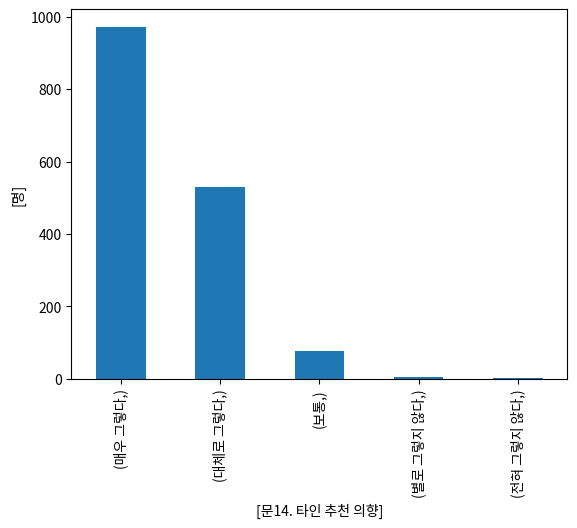

In [ ]:
# 타인 추천 의향
info_df.loc[info_df['Q14'] != -1, ['Q14']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q14', '항목명'].head(1).values
)

In [ ]:
# 타인추천의향 점수화
info_df['Q14'].value_counts()

# 점수 매핑
score_mapping = {
    "매우 그렇다": 5,
    "대체로 그렇다": 4,
    "보통": 3,
    "별로 그렇지 않다": 2,
    "전혀 그렇지 않다": 1
}

# 컬럼 값을 점수로 매핑
info_df['Q14_score'] = info_df['Q14'].map(score_mapping)

# 평균 점수 계산
Q14_average = info_df['Q14_score'].mean()

# 항목명 가져오기
항목명 = columns_value_df.loc[columns_value_df['변수명'] == 'Q14', '항목명'].iloc[0]

print(f'{항목명} : {Q14_average:.2f}')

문14. 타인 추천 의향 : 4.55


**[Summary]** <br>
* 방문객 중 여성/20대가 가장 높음 <br>
* 재방문율 : 63.98% <br>
* 한국 관심 계기 : (한류 콘텐츠를 접하고 나서) <br>
* 방문 고려한 아시아 국가 : 일본 <br>
* 고려한 관광활동&참여한 활동 : 1위 쇼핑,  2위 식도락,  3위 자연경관 감상 <br>
* 주로 이용한 사이트 : 소셜 미디어 (웨이보?) <br>
* 부족했던 정보 : 교통정보(이동거리, 동선 등) --- 중국인들은 네이버지도나 구글지도를 못 쓰나 봄? <br>
* 동반자 유무 : 동반자 없음(나혼자 관광객)이 절반 이상 <br><br>

* 가장 좋았던 곳 : 1위 명동, 2위 홍대, 3위 경복궁 <br>
* 숙박기간 : 1위 4박5일, 2위 3박4일, 3위 5박6일 <br>
* 쇼핑항목 : 1위 향수/화장품,  2위 식료품(김치, 김, 과자등), 3위 의류 <br>
* 쇼핑장소 : 1위 면세점, 2위 백화점, 3위 대형쇼핑몰 --- 전통시장이 꼴찌! <br><br>

* 전반적 만족도 : 4.50점 <br>
* 만족도 가장 높은 활동 : K-POP/한류스타 관련 장소 방문 (4.72) <br>
* 만족도 가장 낮은 활동 : 지역 축제 참여 (4.28) <br><br>

* 재방문 의사 : 4.56점 <br>
* 타인 추천 의향 :  4.55점 <br>

In [107]:
pd.reset_option('display.max_columns')      # 설정 초기화